In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import csv

# Read the csv files
death_file = os.path.join("Resources","Deaths_By_P&E.csv")
insurance_file = os.path.join("Resources","Insured_By_State.csv")

# Create Dataframes
deathFile_df = pd.read_csv(death_file)
insuranceFile_df = pd.read_csv(insurance_file, skiprows=[0,1])
insuranceFile_df
# Insurance file header
insuranceFile_df.head()

,Location,Employer,Non-Group,Medicaid,Medicare,Other Public,Uninsured,Total
0,United States,0.49,0.07,0.19,0.14,0.02,0.09,1.0
1,Alabama,0.47,0.05,0.21,0.16,0.03,0.09,1.0
2,Alaska,0.46,0.03,0.20,0.10,0.08,0.14,1.0
3,Arizona,0.44,0.05,0.21,0.15,0.03,0.12,1.0
4,Arkansas,0.44,0.09,0.21,0.17,0.02,0.08,1.0


In [2]:
# Death file header
deathFile_df.head()

,geoid,Region,State,age,season,MMWR Year/Week,Deaths from influenza,Deaths from pneumonia,Deaths from pneumonia and influenza,All Deaths,Pecent of deaths due to pneumonia or influenza,pecent complete
0,National,NaN,NaN,All,2009-10,200940,149.0,3484.0,3633.0,46412.0,7.827717,97.546212
1,National,NaN,NaN,All,2009-10,200941,174.0,3703.0,3877.0,46453.0,8.346070,97.632384
2,National,NaN,NaN,All,2009-10,200942,239.0,3841.0,4080.0,47451.0,8.598344,99.729926
3,National,NaN,NaN,All,2009-10,200943,295.0,3762.0,4057.0,46432.0,8.737509,97.588247
4,National,NaN,NaN,All,2009-10,200944,298.0,3858.0,4156.0,47372.0,8.773115,99.563888


In [3]:
# Cleaning up the death data file

# Breaking up the "MMWR Year/Week" column and converting into just a "Year" Column
deathFile_df['Year'] = deathFile_df['MMWR Year/Week'].astype(str).str[0:4]

# Drops the season and MMWR Year/Week column
Drop_season_and_yearWeek_df= deathFile_df.drop(['season', 'MMWR Year/Week', 'pecent complete'], axis=1)
# Death file header
#Drop_season_and_yearWeek_df.head()

# Fixing spelling errors in column names
spell_check_df = Drop_season_and_yearWeek_df.rename(index=str, 
                                                    columns={"geoid": "Geo ID", 
                                                             "age": "Age", 
                                                             "Deaths from pneumonia and influenza": 
                                                             "Deaths from Pneumonia and Influenza", 
                                                             "Pecent of deaths due to pneumonia or influenza": 
                                                             "Percent of deaths due to Pneumonia or Influenza"})
# Spell check header
spell_check_df.head()

,Geo ID,Region,State,Age,Deaths from influenza,Deaths from pneumonia,Deaths from Pneumonia and Influenza,All Deaths,Percent of deaths due to Pneumonia or Influenza,Year
0,National,NaN,NaN,All,149.0,3484.0,3633.0,46412.0,7.827717,2009
1,National,NaN,NaN,All,174.0,3703.0,3877.0,46453.0,8.346070,2009
2,National,NaN,NaN,All,239.0,3841.0,4080.0,47451.0,8.598344,2009
3,National,NaN,NaN,All,295.0,3762.0,4057.0,46432.0,8.737509,2009
4,National,NaN,NaN,All,298.0,3858.0,4156.0,47372.0,8.773115,2009


In [4]:
# Creating a data frame for just the states
# Drop region column in the data frame
drop_region_df = pd.DataFrame(spell_check_df.drop(['Region', 'Deaths from influenza', 'Deaths from pneumonia'], axis=1))
drop_region_df.head()

,Geo ID,State,Age,Deaths from Pneumonia and Influenza,All Deaths,Percent of deaths due to Pneumonia or Influenza,Year
0,National,NaN,All,3633.0,46412.0,7.827717,2009
1,National,NaN,All,3877.0,46453.0,8.346070,2009
2,National,NaN,All,4080.0,47451.0,8.598344,2009
3,National,NaN,All,4057.0,46432.0,8.737509,2009
4,National,NaN,All,4156.0,47372.0,8.773115,2009


In [5]:
#Deaths from Pneumonia and Influenza in the year of 2016 of every state.
states_2016_pneu_influ = pd.DataFrame(spell_check_df.loc[spell_check_df["Year"] == "2016"].groupby("State")["Deaths from Pneumonia and Influenza"].sum())
states_2016_pneu_influ

,Deaths from Pneumonia and Influenza
State,
Alabama,2909.0
Alaska,237.0
Arizona,3502.0
Arkansas,2388.0
California,20086.0
Colorado,2171.0
Connecticut,2076.0
Delaware,533.0
District of Columbia,259.0


In [6]:
#Deaths from all other causes other than Pnuemonia and influenza in the year of 2016 of every state.
states_2016_allDeaths = pd.DataFrame(spell_check_df.loc[spell_check_df["Year"] == "2016"].groupby("State")["All Deaths"].sum())

states_2016_allDeaths

,All Deaths
State,
Alabama,52160.0
Alaska,4458.0
Arizona,56328.0
Arkansas,31581.0
California,260586.0
Colorado,37308.0
Connecticut,30373.0
Delaware,8836.0
District of Columbia,5018.0


In [7]:
# Edit the data so that it appears as percentages
# Drop the total column
Drop_total_df = pd.DataFrame(insuranceFile_df.drop(['Total'], axis=1))

Drop_total_df

Drop_total_df = Drop_total_df.drop(Drop_total_df.index[52:78])
# Replace Null with 0
drop_null_df = Drop_total_df.fillna(0)

perc_df = drop_null_df.style.format({
   'Employer': '{:,.0%}'.format,
   'Non-Group': '{:,.0%}'.format,
   'Medicaid': '{:,.0%}'.format,
    'Medicare':'{:,.0%}'.format,
    'Other Public': '{:,.0%}'.format,
    'Uninsured':'{:,.0%}'.format
})

perc_df

,Location,Employer,Non-Group,Medicaid,Medicare,Other Public,Uninsured
0,United States,49%,7%,19%,14%,2%,9%
1,Alabama,47%,5%,21%,16%,3%,9%
2,Alaska,46%,3%,20%,10%,8%,14%
3,Arizona,44%,5%,21%,15%,3%,12%
4,Arkansas,44%,9%,21%,17%,2%,8%
5,California,46%,8%,25%,11%,1%,8%
6,Colorado,52%,7%,16%,13%,3%,10%
7,Connecticut,54%,6%,20%,14%,0%,6%
8,Delaware,47%,4%,22%,16%,2%,9%
9,District of Columbia,51%,7%,24%,11%,0%,5%


Current size: [6.0, 4.0]
 size is now: [24, 9]


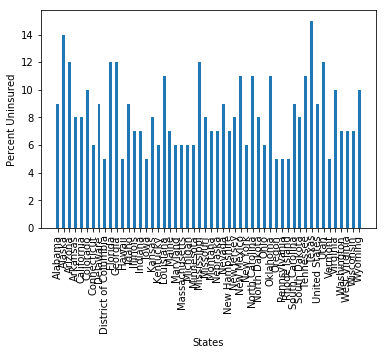

In [8]:
xaxis=drop_null_df["Location"]
yaxis=drop_null_df["Uninsured"]*100

plt.bar(xaxis,yaxis, align='center', width=.5)
plt.xticks(rotation=90)

# Get current size
fig_size = plt.rcParams["figure.figsize"]


print("Current size:", fig_size)
 
# # Set figure width to 12 and height to 9
fig_size[0] = 24
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
print(" size is now:", fig_size)

plt.ylabel('Percent Uninsured')
plt.xlabel('States')

plt.show()

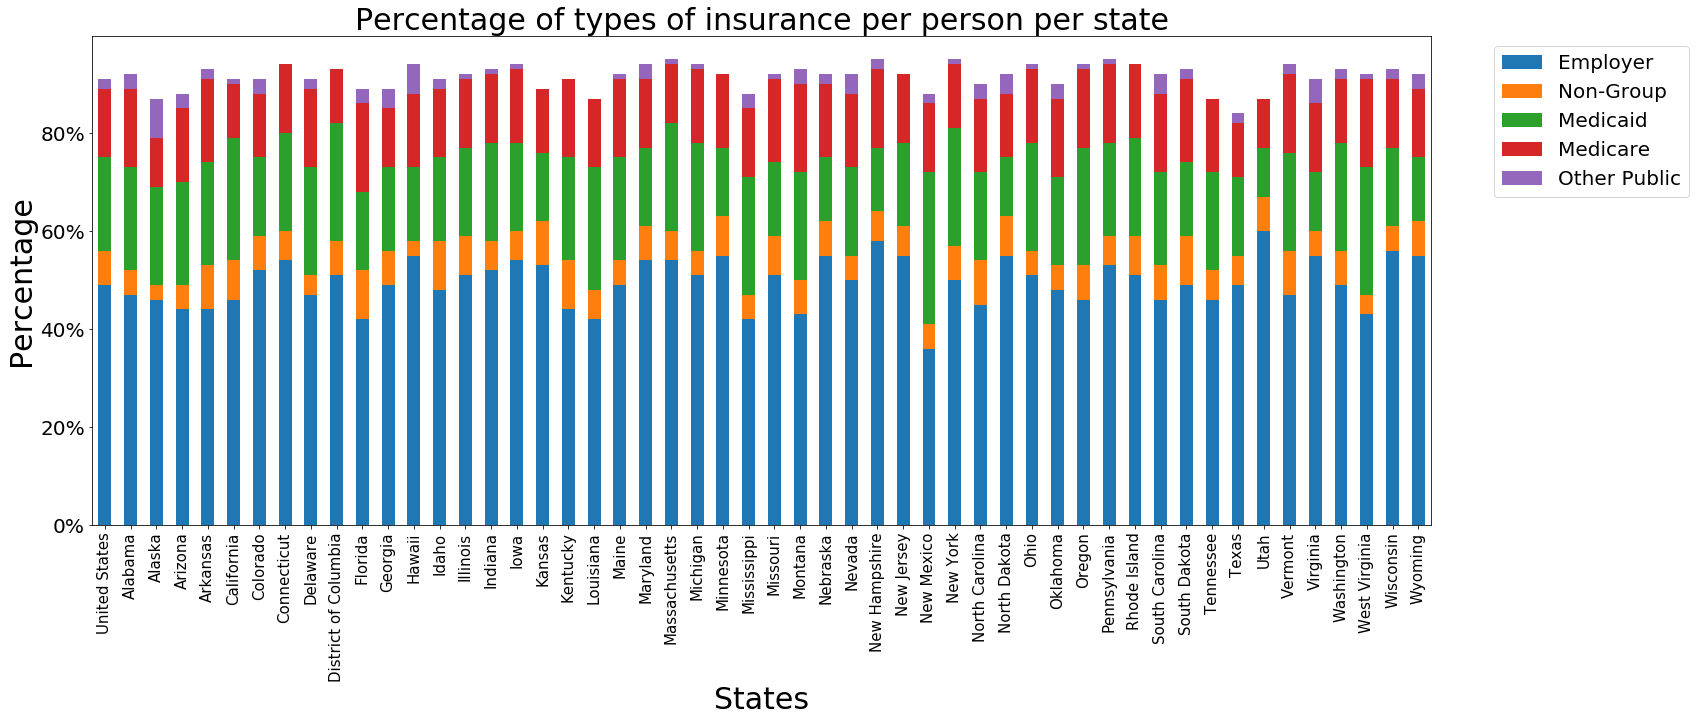

In [9]:
# Removing the uninsured column to adjust for the chart
remove_uninsured_df = pd.DataFrame(drop_null_df.drop(['Uninsured'], axis=1))

# Plots the graph
graph = remove_uninsured_df.plot.bar(xaxis, stacked=True)

# Formats the graph
plt.title('Percentage of types of insurance per person per state', size = 30)
plt.ylabel('Percentage', size = 30)
plt.xlabel('States', size = 30)
plt.legend(loc='upper right', bbox_to_anchor=(1.20, 1), prop={'size': 20})
plt.xticks(size = 15)
plt.yticks(size = 20)

# Converts the y axis to percentages
graph.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

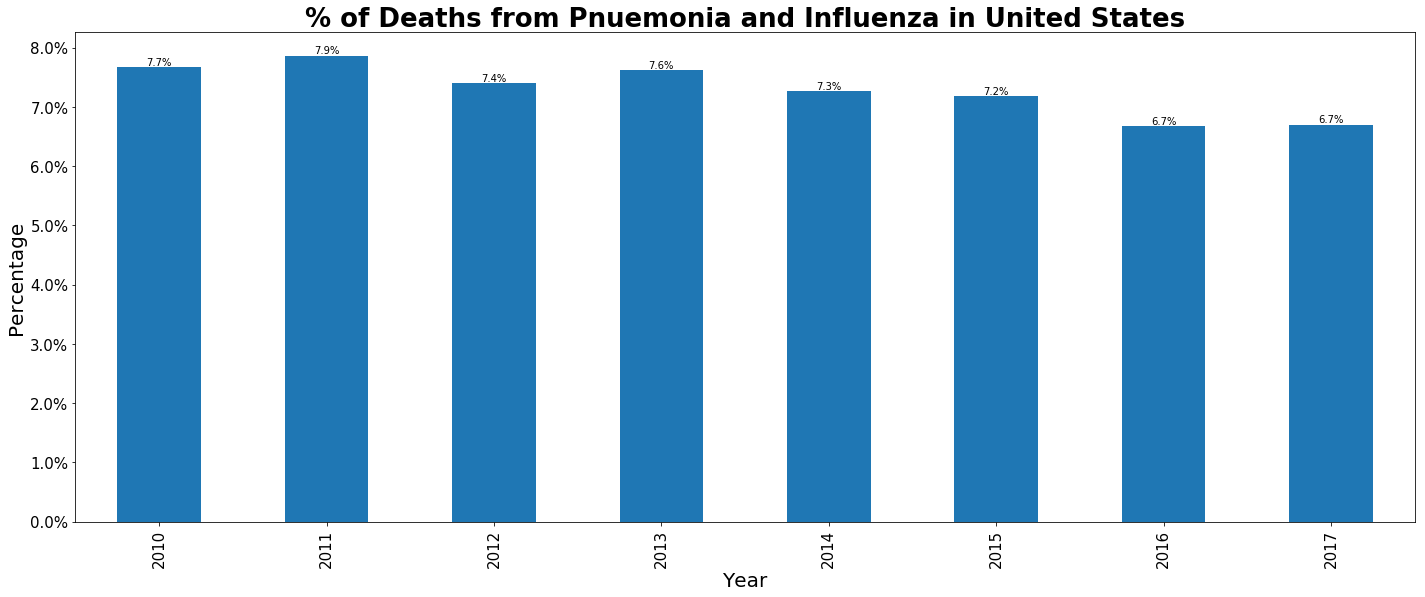

In [10]:
#new dataframe which includes data from Deaths from influe/pneu/influ & pneu combined and All other deaths.
national_df = pd.DataFrame(spell_check_df[["Geo ID", "Deaths from influenza","Deaths from pneumonia",
                              "Deaths from Pneumonia and Influenza","All Deaths","Year"]])

#Change the dstype from float to Integer and Groupby using Year. 
national_df = national_df.loc[national_df["Geo ID"] == "National"].groupby("Year").sum().astype(int)

#drop the rows for the year 2009 and 2018 because we only want to include the years with data from all 52 weeks.
national_df = national_df.drop(["2009","2018"])

#How many % of people died from Pneumonia and influenza. Calculate from All deaths.
national_df["% Deaths from Pneumonia and Influenza"] = (national_df["Deaths from Pneumonia and Influenza"]/
                                                         national_df["All Deaths"])
national_df.style.format({"% Deaths from Pneumonia and Influenza": '{:,.1%}'.format})

#Plot
ax = national_df["% Deaths from Pneumonia and Influenza"].plot(kind="Bar")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
rects = ax.patches
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, '{:,.1%}'.format(height), ha='center', va='bottom')
plt.title("% of Deaths from Pnuemonia and Influenza in United States", fontsize=26, fontweight="bold")
plt.ylabel("Percentage",size=20)
plt.xlabel("Year",size=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.rcParams["figure.figsize"] = [25,9]
plt.rcParams.update({'font.size': 20})
plt.show()